In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return np.sin(x) + np.cos(x)

In [3]:
x_axis = np.linspace(0,1,100)

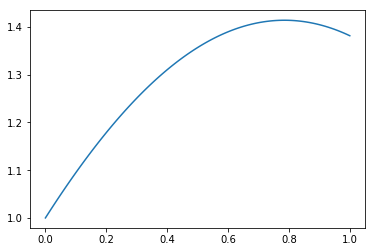

In [4]:
#%matplotlib notebook
plt.plot(x_axis, f(x_axis))
plt.show()

In [5]:
g = lambda x: x**2

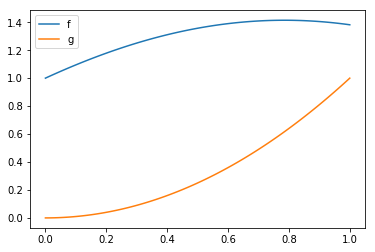

In [6]:
plt.plot(x_axis, f(x_axis), label="f")
plt.plot(x_axis, g(x_axis), label="g")
plt.legend()

In [7]:
def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2 / (2*sig**2)) / np.sqrt(2 * np.pi * sig**2)

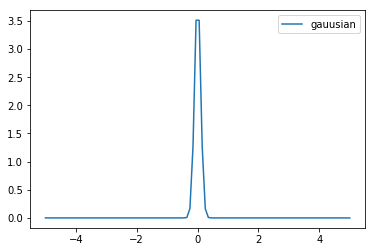

In [8]:
x_axis = np.linspace(-5, 5,100)
plt.plot(x_axis, gaussian(x_axis, 0, 0.1), label="gauusian")
plt.legend()
plt.show()

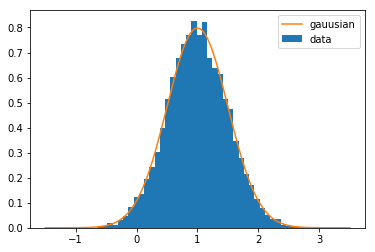

In [9]:
mu, sig = 1.0, 0.5
x_axis = np.linspace(mu-5*sig, mu+5*sig,200)
data = np.random.randn(10000)
data = data * sig + mu
plt.hist(data, normed=True, bins=50, label = "data")
plt.plot(x_axis, gaussian(x_axis, mu, sig), label="gauusian")
plt.legend()
plt.show()

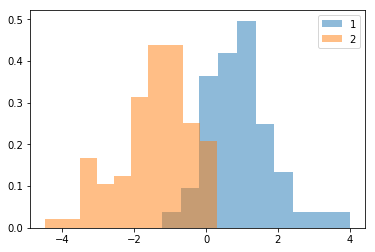

In [10]:
mu1, sig1 = 1.0, 0.9
mu2, sig2 = -1.5, 1.0
N1, N2 = 100, 100
N = N1 + N2
data1 = np.random.randn(N1) * sig1 + mu1
data2 = np.random.randn(N2) * sig2 + mu2
plt.hist(data1, normed=True, bins=10, label = "1", alpha=0.5)
plt.hist(data2, normed=True, bins=10, label = "2", alpha=0.5)
plt.legend()
plt.show()

In [11]:
data = np.concatenate((data1, data2), axis=0)

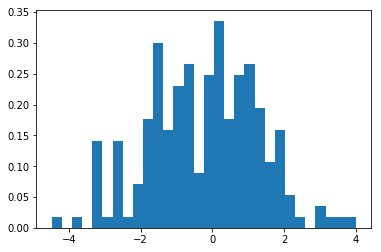

In [12]:
plt.hist(data, normed=True, bins=30);

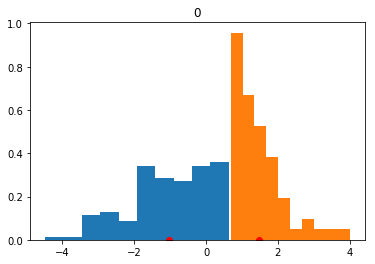

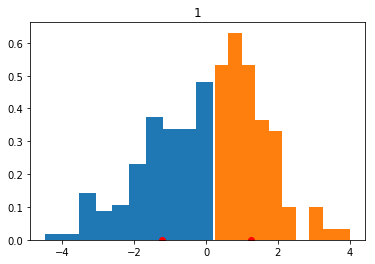

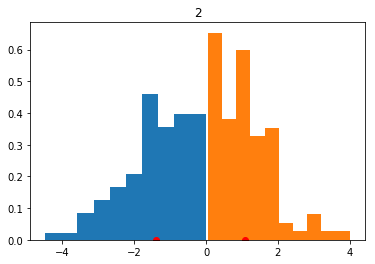

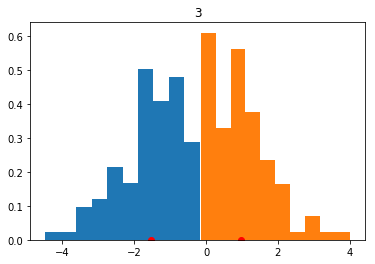

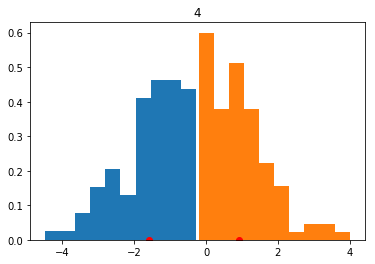

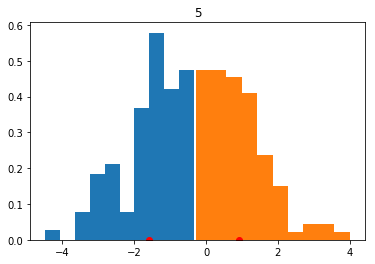

In [13]:
K = 2
v = np.random.randn(K)
cls = np.zeros(len(data))
for i in range(100):
    distance = np.abs(np.reshape(data, (N,1)) - v)
    cls = np.argmin(distance, axis=1)
    v_temp = np.array([np.mean(data[cls==j]) for j in range(K)])
    
    # 収束判定
    if np.array_equal(v, v_temp): break
    else: v = v_temp

    # plot
    for j in range(K):
        plt.hist(data[cls == j], normed=True)
    plt.plot(v, v*0, "ro")
    plt.title(i)
    plt.show()